In [1]:
import pandas as pd
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, train_test_split, cross_val_predict
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [18]:
# load data 
df = pd.read_parquet('processed_data.parquet')

In [5]:
#pd max columnn
pd.set_option('display.max_columns', None)
df.head()

,age_ind,posted_speed_limit_ind,num_units_ind,crash_hour_ind,crash_day_of_week_ind,crash_month_ind,person_type_ind_BICYCLE,person_type_ind_PEDESTRIAN,sex_ind_0,sex_ind_F,sex_ind_M,sex_ind_X,pedpedal_visibility_ind_0,pedpedal_visibility_ind_CONTRASTING CLOTHING,pedpedal_visibility_ind_NO CONTRASTING CLOTHING,pedpedal_visibility_ind_OTHER LIGHT SOURCE USED,pedpedal_visibility_ind_REFLECTIVE MATERIAL,pedpedal_location_ind_0,pedpedal_location_ind_BIKE LANE,pedpedal_location_ind_BIKEWAY,pedpedal_location_ind_DRIVEWAY ACCESS,pedpedal_location_ind_IN CROSSWALK,pedpedal_location_ind_IN ROADWAY,pedpedal_location_ind_NOT IN ROADWAY,pedpedal_location_ind_SHOULDER,pedpedal_location_ind_UNKNOWN/NA,traffic_control_device_ind_BICYCLE CROSSING SIGN,traffic_control_device_ind_DELINEATORS,traffic_control_device_ind_FLASHING CONTROL SIGNAL,traffic_control_device_ind_LANE USE MARKING,traffic_control_device_ind_NO CONTROLS,traffic_control_device_ind_NO PASSING,traffic_control_device_ind_OTHER,traffic_control_device_ind_OTHER RAILROAD CROSSING,traffic_control_device_ind_OTHER REG. SIGN,traffic_control_device_ind_OTHER WARNING SIGN,traffic_control_device_ind_PEDESTRIAN CROSSING SIGN,traffic_control_device_ind_POLICE/FLAGMAN,traffic_control_device_ind_RAILROAD CROSSING GATE,traffic_control_device_ind_RR CROSSING SIGN,traffic_control_device_ind_SCHOOL ZONE,traffic_control_device_ind_STOP SIGN/FLASHER,traffic_control_device_ind_TRAFFIC SIGNAL,traffic_control_device_ind_UNKNOWN,traffic_control_device_ind_YIELD,weather_condition_ind_BLOWING SNOW,weather_condition_ind_CLEAR,weather_condition_ind_CLOUDY/OVERCAST,weather_condition_ind_FOG/SMOKE/HAZE,weather_condition_ind_FREEZING RAIN/DRIZZLE,weather_condition_ind_OTHER,weather_condition_ind_RAIN,weather_condition_ind_SEVERE CROSS WIND GATE,weather_condition_ind_SLEET/HAIL,weather_condition_ind_SNOW,weather_condition_ind_UNKNOWN,lighting_condition_ind_DARKNESS,"lighting_condition_ind_DARKNESS, LIGHTED ROAD",lighting_condition_ind_DAWN,lighting_condition_ind_DAYLIGHT,lighting_condition_ind_DUSK,lighting_condition_ind_UNKNOWN,first_crash_type_ind_ANGLE,first_crash_type_ind_ANIMAL,first_crash_type_ind_FIXED OBJECT,first_crash_type_ind_HEAD ON,first_crash_type_ind_OTHER NONCOLLISION,first_crash_type_ind_OTHER OBJECT,first_crash_type_ind_PARKED MOTOR VEHICLE,first_crash_type_ind_PEDALCYCLIST,first_crash_type_ind_PEDESTRIAN,first_crash_type_ind_REAR END,first_crash_type_ind_REAR TO FRONT,first_crash_type_ind_REAR TO REAR,first_crash_type_ind_REAR TO SIDE,first_crash_type_ind_SIDESWIPE OPPOSITE DIRECTION,first_crash_type_ind_SIDESWIPE SAME DIRECTION,first_crash_type_ind_TRAIN,first_crash_type_ind_TURNING,trafficway_type_ind_ALLEY,trafficway_type_ind_CENTER TURN LANE,trafficway_type_ind_DIVIDED - W/MEDIAN (NOT RAISED),trafficway_type_ind_DIVIDED - W/MEDIAN BARRIER,trafficway_type_ind_DRIVEWAY,"trafficway_type_ind_FIVE POINT, OR MORE",trafficway_type_ind_FOUR WAY,trafficway_type_ind_L-INTERSECTION,trafficway_type_ind_NOT DIVIDED,trafficway_type_ind_NOT REPORTED,trafficway_type_ind_ONE-WAY,trafficway_type_ind_OTHER,trafficway_type_ind_PARKING LOT,trafficway_type_ind_RAMP,trafficway_type_ind_ROUNDABOUT,trafficway_type_ind_T-INTERSECTION,trafficway_type_ind_TRAFFIC ROUTE,trafficway_type_ind_UNKNOWN,trafficway_type_ind_UNKNOWN INTERSECTION TYPE,trafficway_type_ind_Y-INTERSECTION,alignment_ind_CURVE ON GRADE,alignment_ind_CURVE ON HILLCREST,"alignment_ind_CURVE, LEVEL",alignment_ind_STRAIGHT AND LEVEL,alignment_ind_STRAIGHT ON GRADE,alignment_ind_STRAIGHT ON HILLCREST,roadway_surface_cond_ind_DRY,roadway_surface_cond_ind_ICE,roadway_surface_cond_ind_OTHER,"roadway_surface_cond_ind_SAND, MUD, DIRT",roadway_surface_cond_ind_SNOW OR SLUSH,roadway_surface_cond_ind_UNKNOWN,roadway_surface_cond_ind_WET,road_defect_ind_DEBRIS ON ROADWAY,road_defect_ind_NO DEFECTS,road_defect_ind_OTHER,"road_defect_ind_RUT, HOLES",road_defect_ind_SHOULDER DEFECT,road_defect_ind_UNKNOWN,road_defect_ind_WORN SURFACE,report_type_ind_0,report_type_i

In [23]:
#show all columns where name has crash
df.filter(like='crash', axis=1).head()

,crash_hour_ind,crash_day_of_week_ind,crash_month_ind,first_crash_type_ind_ANGLE,first_crash_type_ind_ANIMAL,first_crash_type_ind_FIXED OBJECT,first_crash_type_ind_HEAD ON,first_crash_type_ind_OTHER NONCOLLISION,first_crash_type_ind_OTHER OBJECT,first_crash_type_ind_PARKED MOTOR VEHICLE,first_crash_type_ind_PEDALCYCLIST,first_crash_type_ind_PEDESTRIAN,first_crash_type_ind_REAR END,first_crash_type_ind_REAR TO FRONT,first_crash_type_ind_REAR TO REAR,first_crash_type_ind_REAR TO SIDE,first_crash_type_ind_SIDESWIPE OPPOSITE DIRECTION,first_crash_type_ind_SIDESWIPE SAME DIRECTION,first_crash_type_ind_TRAIN,first_crash_type_ind_TURNING,crash_type_ind_INJURY AND / OR TOW DUE TO CRASH,crash_type_ind_NO INJURY / DRIVE AWAY
0,18,3,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,17,3,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,15,3,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,15,3,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,12,3,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


Accuracy: 71.26%
              precision    recall  f1-score   support

           0       0.60      0.34      0.44      1470
           1       0.74      0.89      0.81      3053

    accuracy                           0.71      4523
   macro avg       0.67      0.62      0.62      4523
weighted avg       0.69      0.71      0.69      4523

[[ 505  965]
 [ 335 2718]]


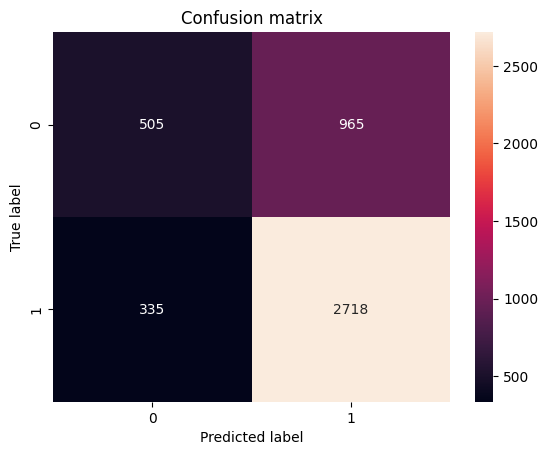

In [26]:
#xgboost on df [target]
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import numpy as np

#change target to binary
df['target'] = df['target'].replace(2,1)

#split data into X and y
X = df.drop(['target','crash_type_ind_INJURY AND / OR TOW DUE TO CRASH','crash_type_ind_NO INJURY / DRIVE AWAY'], axis=1)
y = df['target']

#split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#instantiate model and train
model = XGBClassifier()
model.fit(X_train, y_train)

#make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

#evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

#classification report
print(classification_report(y_test, y_pred))

#confusion matrix
print(confusion_matrix(y_test, y_pred))
#use seaborn to plot confusion matrix with labels
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
#labels
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix')
plt.show()


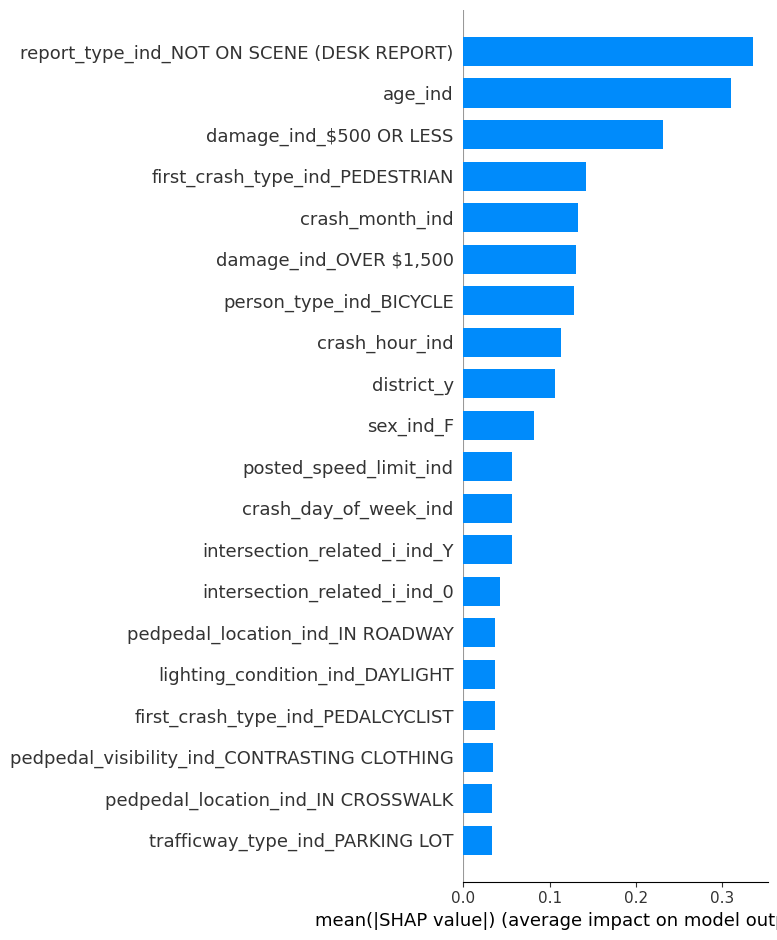

In [27]:
#shap values
import shap
shap.initjs()
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")


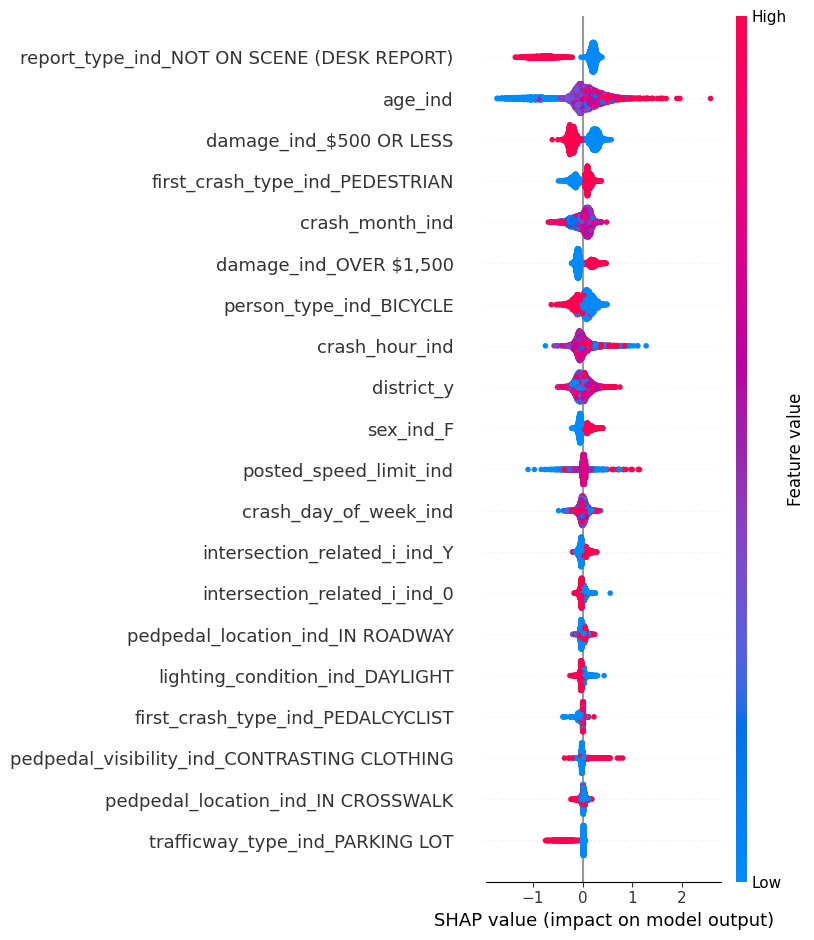

In [28]:
#shap plot
shap.summary_plot(shap_values, X_test)

In [15]:
input_cols = ['age_ind', 'district_y', 'crash_hour_ind', 'posted_speed_limit_ind', 'street_direction_ind_S', 'street_direction_ind_N',
 'lighting_condition_ind_DAYLIGHT','crash_day_of_week_ind', 'target']

df = df[input_cols]

In [74]:
# Split the data into X and y
X = df.drop(columns=['target']).to_numpy() 
y = df['target'].to_numpy() 

In [75]:
df['target'].value_counts()

target
1    11937
0     7411
2     3265
Name: count, dtype: int64

Naive Bayes can be extended to handle multi-class classification problems. In this context, it calculates the probability of each class given the features and selects the class with the highest probability as the predicted class.

Logistic Regression can be extended to handle multi-class classification tasks. One common approach is the one-vs-rest (OvR) strategy, where separate binary classifiers are trained for each class. Each classifier is trained to distinguish between one class and the rest. Alternatively, the one-vs-one (OvO) strategy trains a binary classifier for each pair of classes.

SVM: SVM can be adapted to handle multi-class classification using either the one-vs-one (OvO) or one-vs-rest (OvR) strategy. In OvO, a binary classifier is trained for each pair of classes, and the class with the most votes is chosen. In OvR, separate binary classifiers are trained for each class, where each classifier distinguishes between one class and the rest.

Random Forest: Ensemble learning method that combines the strengths of decision trees with randomization to achieve high predictive accuracy and generalization performance.

Gradient Boosting: Builds an ensemble of weak learners, optimizing them using gradient descent to minimize a loss function and achieve strong predictive performance.


In [76]:
from sklearn.naive_bayes import GaussianNB

def naive_bayes_accuracy_per_class(X, y, n_splits=5, n_repeats=2):
    nb_classifier = GaussianNB()

    # Perform cross-validation and get predicted labels for each sample
    y_pred = cross_val_predict(nb_classifier, X, y, cv=n_splits, n_jobs=-1)

    # accuracy for each class
    accuracy_per_class = []
    for class_label in np.unique(y):
        class_indices = np.where(y == class_label)[0]
        class_accuracy = accuracy_score(y[class_indices], y_pred[class_indices])
        accuracy_per_class.append(class_accuracy)

    return accuracy_per_class

# Example:
accuracies = naive_bayes_accuracy_per_class(X, y)
for i, acc in enumerate(accuracies):
    print(f"Accuracy for class {i}: {acc:.4f}")


Accuracy for class 0: 0.1753
Accuracy for class 1: 0.9079
Accuracy for class 2: 0.0021


In [79]:
from sklearn.linear_model import LogisticRegression

def logistic_regression_accuracy_per_class(X, y, n_splits=5, n_repeats=2):
    lr_classifier = LogisticRegression(multi_class='multinomial', solver='lbfgs')

    # cross-validation and get predicted labels for each sample
    y_pred = cross_val_predict(lr_classifier, X, y, cv=n_splits, n_jobs=-1)

    # accuracy for each class
    accuracy_per_class = []
    for class_label in np.unique(y):
        class_indices = np.where(y == class_label)[0]
        class_accuracy = accuracy_score(y[class_indices], y_pred[class_indices])
        accuracy_per_class.append(class_accuracy)

    return accuracy_per_class

# Example:
accuracies = logistic_regression_accuracy_per_class(X, y)
for i, acc in enumerate(accuracies):
    print(f"Accuracy for class {i}: {acc:.4f}")


/opt/anaconda3/envs/chicago/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/chicago/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

Accuracy for class 0: 0.0734
Accuracy for class 1: 0.9778
Accuracy for class 2: 0.0000


/opt/anaconda3/envs/chicago/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [80]:
from sklearn.svm import SVC

def svm_accuracy_per_class(X, y, n_splits=5, n_repeats=2):
    svm_classifier = SVC()

    # cross-validation and get predicted labels for each sample
    y_pred = cross_val_predict(svm_classifier, X, y, cv=n_splits, n_jobs=-1)

    # accuracy for each class
    accuracy_per_class = []
    for class_label in np.unique(y):
        class_indices = np.where(y == class_label)[0]
        class_accuracy = accuracy_score(y[class_indices], y_pred[class_indices])
        accuracy_per_class.append(class_accuracy)

    return accuracy_per_class

# Example:
accuracies = svm_accuracy_per_class(X, y)
for i, acc in enumerate(accuracies):
    print(f"Accuracy for class {i}: {acc:.4f}")


Accuracy for class 0: 0.2154
Accuracy for class 1: 0.9261
Accuracy for class 2: 0.0000


In [81]:
from sklearn.ensemble import RandomForestClassifier

def random_forest_accuracy_per_class(X, y, n_splits=5, n_repeats=2):
    rf_classifier = RandomForestClassifier()

    # cross-validation and get predicted labels for each sample
    y_pred = cross_val_predict(rf_classifier, X, y, cv=n_splits, n_jobs=-1)

    # accuracy for each class
    accuracy_per_class = []
    for class_label in np.unique(y):
        class_indices = np.where(y == class_label)[0]
        class_accuracy = accuracy_score(y[class_indices], y_pred[class_indices])
        accuracy_per_class.append(class_accuracy)

    return accuracy_per_class

# Example:
accuracies = random_forest_accuracy_per_class(X, y)
for i, acc in enumerate(accuracies):
    print(f"Accuracy for class {i}: {acc:.4f}")


Accuracy for class 0: 0.3330
Accuracy for class 1: 0.6923
Accuracy for class 2: 0.0833


In [82]:
from sklearn.ensemble import GradientBoostingClassifier

def gradient_boosting_accuracy_per_class(X, y, n_splits=5, n_repeats=2):
    gb_classifier = GradientBoostingClassifier()

    # cross-validation and predicted class for each sample
    y_pred = cross_val_predict(gb_classifier, X, y, cv=n_splits, n_jobs=-1)

    # accuracy for each class
    accuracy_per_class = []
    for class_label in np.unique(y):
        class_indices = np.where(y == class_label)[0]
        class_accuracy = accuracy_score(y[class_indices], y_pred[class_indices])
        accuracy_per_class.append(class_accuracy)

    return accuracy_per_class

# Example:
accuracies = gradient_boosting_accuracy_per_class(X, y)
for i, acc in enumerate(accuracies):
    print(f"Accuracy for class {i}: {acc:.4f}")


Accuracy for class 0: 0.2086
Accuracy for class 1: 0.9332
Accuracy for class 2: 0.0089
